***Pandas*** is a Python library that is used for data manipulation and analysis. It provides easy-to-use data structures and data analysis tools for working with structured data, such as tables or databases. 

***Pandas*** is built on top of ***NumPy***, another popular Python library for numerical computing, and it is often used in combination with other libraries for data analysis, such as ***Matplotlib***, ***Seaborn***, and ***Scikit-learn***.

In order to work with Pandas, you need to import the library using the `import` statement.

In [2]:
# the "as pd" is renaming the Pandas library into pd
# it is much more convenient to use pd when calling the library
import pandas as pd

# Basics

## Lesson

Pandas can create two data structure: 

*   the ***Series***
*   the ***DataFrame***

A Series is a one-dimensional array-like object that can hold any data type, such as integers, strings, or floating-point numbers. A DataFrame is a two-dimensional tabular data structure that can hold multiple Series objects, with rows and columns labeled for easy indexing and manipulation.

<div>
<img src=https://storage.googleapis.com/lds-media/images/series-and-dataframe.width-1200.png width="500"/>
</div>

You would typically ***use a Pandas Series instead of a DataFrame when you are working with a one-dimensional array*** of data or a ***single column of a DataFrame***.

You can create a Series using the ***`pd.Series()` function***.<br>

In [3]:
my_list = [1, 2, 3, 4, 5]

my_series = pd.Series(data=my_list)
my_series

0    1
1    2
2    3
3    4
4    5
dtype: int64

It is possible to ***specify a name and a custom index*** to the Series.

In [4]:
#Set addtional "name" for the Series and "index" for values.
my_series = pd.Series(data=my_list,
                      name='my_series name',
                      index=[4,5,6,7,8])
my_series

4    1
5    2
6    3
7    4
8    5
Name: my_series name, dtype: int64

You can also create a Dataframe using the ***`pd.DataFrame()` function***.<br>
The Dataframe accepts a lot of data including:

*   Numpy array
*   Lists and Tuples
*   Dictionnaries 

In [5]:
df = pd.DataFrame(data=my_list)
df

,0
0,1
1,2
2,3
3,4
4,5


It is possible to ***specify column names and a custom index*** to the DataFrame.


In [6]:
# Columns = ['name1', 'name2'] for assigning names, index for assgining index for values
df = pd.DataFrame(data=my_list,
                  columns=['Col 1'],
                  index=[4,5,6,7,8])
df

,Col 1
4,1
5,2
6,3
7,4
8,5


You can ***create a dataframe with multiple columns***. <br>To do so you can use a dictionnary.

In [7]:
my_dict = {'col 1' : ['a', 'b', 'c', 'd'],
           'col 2' : [0, 1, 2, 3],
           'col 3' : [0.,0.1,0.2,0.3]}

df = pd.DataFrame(data=my_dict)
df

,col 1,col 2,col 3
0,a,0,0.0
1,b,1,0.1
2,c,2,0.2
3,d,3,0.3


A Dataframe contains columns and rows.<br>
It is possible to have a ***global view of the Dataframe content*** by using the following functions:


*   `.head(n)` to see the top n rows
*   `.tail(n)` to see the last n rows
*   `.columns` to see the column names
*   `.index` to see the index


In [8]:
df.head(2)

,col 1,col 2,col 3
0,a,0,0.0
1,b,1,0.1


In [9]:
df.tail(2)

,col 1,col 2,col 3
2,c,2,0.2
3,d,3,0.3


In [10]:
df.columns

Index(['col 1', 'col 2', 'col 3'], dtype='object')

In [11]:
df.index

RangeIndex(start=0, stop=4, step=1)

The ***column names can be changed*** by using the `df.rename(columns={'old name':'new name'})` method.<br>
The `inplace=True` parameter allows to modify the original dataframe. <br>By default, the `rename()` method returns a copy of the original dataframe with the new column names.

In [12]:
df.rename(columns={"col 3": "Col n°3",
                   "col 2": "Col n°2",
                   "col 1": "Col n°1"}, inplace=True)
df

,Col n°1,Col n°2,Col n°3
0,a,0,0.0
1,b,1,0.1
2,c,2,0.2
3,d,3,0.3


It is possible to access ***each column of the Dataframe*** by using indexing `df['col_name']`.<br>
The output of this operation is a Series.

In [13]:
df['Col n°1']

0    a
1    b
2    c
3    d
Name: Col n°1, dtype: object

It is possible to access ***multiple columns of the Dataframe*** by using indexing `df[['col_name 1', ..., 'col_name n']]`.<br>
The output of this operation is a DataFrame.

In [14]:
df[['Col n°1', 'Col n°2']]

,Col n°1,Col n°2
0,a,0
1,b,1
2,c,2
3,d,3


It is possible to ***add columns to an existing DataFrame*** by using `df['new col'] = ...`

In [15]:
df['Col n°4'] = [True, True, False, False]
df

,Col n°1,Col n°2,Col n°3,Col n°4
0,a,0,0.0,True
1,b,1,0.1,True
2,c,2,0.2,False
3,d,3,0.3,False


It is also possible to ***remove columns from the dataframe*** by using the `df.drop(columns=["col 1", ..., "col n"])` method on the dataframe. 

Note that the `drop()` method does not modify the original dataframe and returns a copy instead.<br> You can change this behavior by adding the `inplace=True` parameter inside of the `drop()` method.

In [16]:
new_df = df.drop(columns=['Col n°4'])
new_df

,Col n°1,Col n°2,Col n°3
0,a,0,0.0
1,b,1,0.1
2,c,2,0.2
3,d,3,0.3


In [17]:
# The original dataframe has not been modified
df

,Col n°1,Col n°2,Col n°3,Col n°4
0,a,0,0.0,True
1,b,1,0.1,True
2,c,2,0.2,False
3,d,3,0.3,False


It is also possible to ***select the rows of a dataframe*** by using the `df.iloc[]` and the `df.loc[]` methods.

The ***`df.loc[]` method selects the rows by their name whereas `df.iloc[]` selects them by their position***.

If one row is selected, the result is a Series with the values of each column for the given row.

In [18]:
df = pd.DataFrame(data = [[1,5],[2,4],[3,3],[4,2],[5,1]],
                  columns = ['col 1', 'col 2'],
                  index = ['row 1','row 2','row 3','row 4','row 5'])
df

,col 1,col 2
row 1,1,5
row 2,2,4
row 3,3,3
row 4,4,2
row 5,5,1


In [19]:
# The row a position 2 is the 3rd row
df.iloc[2]

col 1    3
col 2    3
Name: row 3, dtype: int64

In [20]:
# The row named row 3 is the 3rd row
df.loc['row 3']

col 1    3
col 2    3
Name: row 3, dtype: int64

If multiple rows are selected using slicing, the result is a DataFrame that contains only the selected rows.

In [21]:
df.iloc[1:3]

,col 1,col 2
row 2,2,4
row 3,3,3


In [22]:
df.loc['row 2':'row 3']

,col 1,col 2
row 2,2,4
row 3,3,3


`df.iloc[]` and `df.loc[]` can also be used to ***select based on both columns and rows***.

In [23]:
# Take the first row and the first column
df.iloc[0,0]

1

In [24]:
# Take the two rows and the second column
df.iloc[0:2,1]

row 1    5
row 2    4
Name: col 2, dtype: int64

In [25]:
# Take the last row and all the columns
# : means "everything"
df.loc['row 5',:]

col 1    5
col 2    1
Name: row 5, dtype: int64

In [26]:
# Take all the rows and the second column
df.loc[:,'col 2']

row 1    5
row 2    4
row 3    3
row 4    2
row 5    1
Name: col 2, dtype: int64

## Exercises

**<font color='blue'>1. Create the following DataFrame.**

<div>
<img src=https://pynative.com/wp-content/uploads/2021/02/dataframe.png width=500>
<div\>

In [29]:
df_ex = pd.DataFrame({
    "Name": ['Joe', 'Nat', 'Harry', 'Sam', 'Monica'],
    "Age": [20, 21, 19, 20, 22],
    "Marks": [85.10, 77.80, 91.54, 88.78, 60.55],
    "Grade": ["A", "B", "A", "A", "B"],
    "Hobby": ['Swimming', 'Reading', 'Music', 'Painting', 'Dancing']
})
df_ex

,Name,Age,Marks,Grade,Hobby
0,Joe,20,85.10,A,Swimming
1,Nat,21,77.80,B,Reading
2,Harry,19,91.54,A,Music
3,Sam,20,88.78,A,Painting
4,Monica,22,60.55,B,Dancing


**<font color='blue'>2. Extract the Grade column into a variable.<br>Is the variable a Dataframe or a Series ?**

In [31]:
co_Grade = df_ex['Grade']
type(co_Grade)

pandas.core.series.Series

**<font color='blue'>3.a. Show the 3 first rows of the original dataframe.<br>3.b. Show the columns name.<br>3.c. Extract the Name, Age and Marks columns and store them into a variable.<br> Is this new variable a Series or a Dataframe ?**

In [38]:
#3.a.
print(df_ex.head(3))

#3.b.
print(df_ex.columns)

#3.c.
df_3c = df_ex[['Name', "Age", 'Marks']]
print(type(df_3c))

    Name  Age  Marks Grade     Hobby
0    Joe   20  85.10     A  Swimming
1    Nat   21  77.80     B   Reading
2  Harry   19  91.54     A     Music
Index(['Name', 'Age', 'Marks', 'Grade', 'Hobby'], dtype='object')
<class 'pandas.core.frame.DataFrame'>


**<font color='blue'>4. Add a Gender column to the dataframe.**

In [39]:
df_ex['Gender'] = ['M', 'F', 'M', "M", "F"]
df_ex

,Name,Age,Marks,Grade,Hobby,Gender
0,Joe,20,85.10,A,Swimming,M
1,Nat,21,77.80,B,Reading,F
2,Harry,19,91.54,A,Music,M
3,Sam,20,88.78,A,Painting,M
4,Monica,22,60.55,B,Dancing,F


**<font color='blue'>5.a. Using the `.iloc[]` method, get the third row**

*Tips: the result should be a Series that contain these info: `Harry	19	91.54	A	Music	M`*

In [41]:
df_ex.iloc[2, :]

Name      Harry
Age          19
Marks     91.54
Grade         A
Hobby     Music
Gender        M
Name: 2, dtype: object

**<font color='blue'>5.b. Using the `.iloc[]` method, get the Nat and Harry information.** 

In [43]:
df_ex.iloc[1:3, :]

,Name,Age,Marks,Grade,Hobby,Gender
1,Nat,21,77.80,B,Reading,F
2,Harry,19,91.54,A,Music,M


**<font color='blue'>6.a. Using the `.iloc[]` method, get the Hobby of Joe**

In [44]:
df_ex.iloc[0,4]

'Swimming'

**<font color='blue'>6.b. Do the same using the `.loc[]` method.**

In [48]:
df_ex.loc[[1,2],]

,Name,Age,Marks,Grade,Hobby,Gender
1,Nat,21,77.80,B,Reading,F
2,Harry,19,91.54,A,Music,M


**<font color='blue'>6.c. Using the `.loc[]` method, get the Marks and the Grade of Sam and Monica**

In [50]:
df_ex.loc[[3,4], ['Marks', 'Grade']]

,Marks,Grade
3,88.78,A
4,60.55,B


# Calculations

## Lesson

Pandas is a powerful data analysis and manipulation library in Python, which provides a variety of operations and calculations that can be performed on a pandas DataFrame, such as:


*   Statistics : mean, median, standard deviation ...
*   Math operators : addition, subtraction ...

***These calculations can be done between Series. <br>It will always results in an element wise operation.***<br>

In [51]:
series_1 = pd.Series([1,2,5,3,6,4,8,5,9,6,5,4])
series_2 = pd.Series([5,6,8,5,4,5,8,9,5,7,6,5])

series_3 = series_1 + series_2
series_3

0      6
1      8
2     13
3      8
4     10
5      9
6     16
7     14
8     14
9     13
10    11
11     9
dtype: int64

In [52]:
series_4 = series_1 * series_2
series_4

0      5
1     12
2     40
3     15
4     24
5     20
6     64
7     45
8     45
9     42
10    30
11    20
dtype: int64

Pandas provides a variety of statistical functions that you can apply to both Series and DataFrame columns. Here are some of the most commonly used statistics that you can compute on pandas Series and DataFrame columns:



*   Counting: `.count()`
*   Summation: `.sum()`
*   Mode: `.mode()`  众数
*   Averaging: `.mean()`
*   Median: `.median()`
*   Minimum / maximum: `.min()` / `.max()`
*   Variance / standard deviation: `.var()` / `.std()`
*   Correlation (Pearson): `.corr()`
*   Quantiles: `.quantile(q=0.5)`

In [53]:
print(f"Series n°1 mean: {series_1.mean()}")
print(f"Series n°2 mean: {series_2.mean()}")

Series n°1 mean: 4.833333333333333
Series n°2 mean: 6.083333333333333


The `describe()` function in pandas is a powerful method that provides summary statistics for a DataFrame or Series. It computes various descriptive statistics, such as the count, mean, standard deviation, minimum, and maximum values, as well as the quartiles for the numeric columns.

In [54]:
series_1.describe()

count    12.000000
mean      4.833333
std       2.289634
min       1.000000
25%       3.750000
50%       5.000000
75%       6.000000
max       9.000000
dtype: float64

***All of these methods can be used on Dataframes.***

In [55]:
df_1 = pd.DataFrame({'A':[1,2,5,4,5,6,5,2,3], 'B':[8,5,2,8,5,12,18,2,11]})
df_1

,A,B
0,1,8
1,2,5
2,5,2
3,4,8
4,5,5
5,6,12
6,5,18
7,2,2
8,3,11


In [56]:
df_1.describe()

,A,B
count,9.000000,9.000000
mean,3.666667,7.888889
std,1.732051,5.182771
min,1.000000,2.000000
25%,2.000000,5.000000
50%,4.000000,8.000000
75%,5.000000,11.000000
max,6.000000,18.000000


## Exercises

**<font color='blue'>1. Reuse the dataframe created at the last exercise and compute the mean of the marks column.**

In [57]:
df_ex['Marks'].mean()

80.754

**<font color='blue'>2. Select both Marks and Age columns and compute the median as well as the first (q=0.25) and the third (q=0.75) quartiles.<br> Is the output a Dataframe or a Series ?**

In [63]:
cal_median = df_ex[['Marks', 'Age']].median()
cal_q1 = df_ex[['Marks', 'Age']].quantile(q = 0.25)
cal_q2 = df_ex[['Marks', 'Age']].quantile(q = 0.75)

**<font color='blue'>3. Create a Dataframe that contains the outputs of question 2.**

*Tips: The dataframe should have Marks and Age as index and Median, Quantile 1, Quantile 2 as columns.*

In [64]:
df_cal = pd.DataFrame({
    "Median": cal_median,
    "Quantile 1": cal_q1,
    "Quantile 2": cal_q2
})
df_cal

,Median,Quantile 1,Quantile 2
Marks,85.1,77.8,88.78
Age,20.0,20.0,21.00


**<font color='blue'>4. Add the dataframe to itself. <br> What's happening ?**

**<font color='blue'>5. Find the most common Grade in the dataframe.**

*Tips: If you don't find how to do it --> [Solution](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html)*

In [65]:
df_ex['Grade'].mode

<bound method Series.mode of 0    A
1    B
2    A
3    A
4    B
Name: Grade, dtype: object>

**<font color='blue'>6. Use the `describe()` method on the numerical columns of the dataframe only.**

In [66]:
df_ex.describe()

,Age,Marks
count,5.000000,5.000000
mean,20.400000,80.754000
std,1.140175,12.415413
min,19.000000,60.550000
25%,20.000000,77.800000
50%,20.000000,85.100000
75%,21.000000,88.780000
max,22.000000,91.540000


# Visualization

## Lessons

In [67]:
import matplotlib.pyplot as plt

Pandas provides several built-in visualization tools that allow you to quickly create various types of charts and graphs to help you understand and communicate your data. Here are some of the visualization tools provided by pandas:

*   **Line charts**: The `plot()` function can be used to create a line chart of a DataFrame or Series.

*   **Bar charts**: The `plot.bar()` function can be used to create a bar chart of a DataFrame or Series.

*   **Histograms**: The `plot.hist()` function can be used to create a histogram of a DataFrame or Series.

*   **Box plots**: The `plot.box()` function can be used to create a box plot of a DataFrame or Series.

*   **Scatter plots**: The `plot.scatter()` function can be used to create a scatter plot of two columns in a DataFrame.

*   **Pie charts**: The `plot.pie()` function can be used to create a pie chart of a Series.

The `.plot()` method can be used to create line plots, area plots, scatter plots, and more for data stored in a pandas DataFrame or Series object.

Here are some of the key features and arguments of the .plot() method:

*  **Parameters**: The method takes several optional parameters that allow you to customize the appearance of the plot, such as the color, line style, marker style, and more. It also takes parameters that are specific to each plot type, such as the kind parameter, which specifies the type of plot to create.

*  **Multiple plots**: You can create multiple plots in a single figure by calling the `.plot()` method multiple times on the same Matplotlib axes object.

`.plot()` [Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

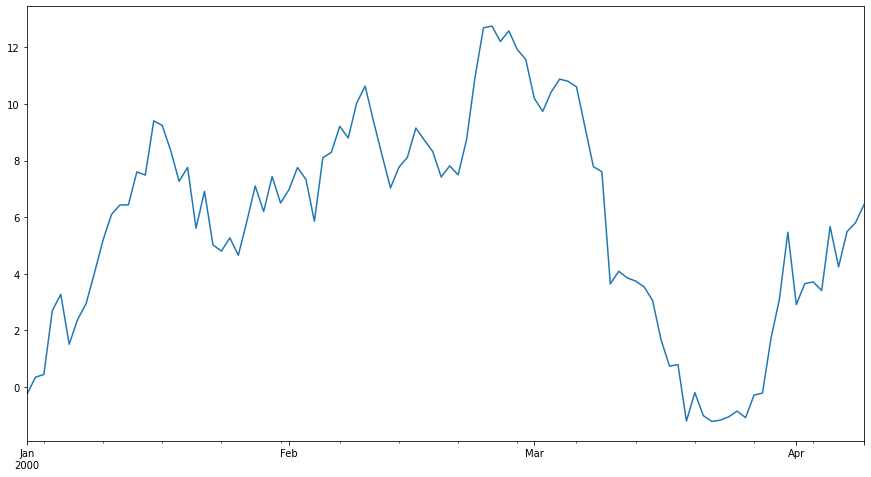

In [69]:
import numpy as np
# Creation of a Time Series
ts = pd.Series(np.random.randn(100), 
               index=pd.date_range("1/1/2000", periods=100)).cumsum()

# Plotting the line
ts.plot(figsize=(15,8))
plt.show()

The line plot can also be used on a Dataframe with multiple Time Series.

            Time Series A  Time Series B  Time Series C  Time Series D
2000-01-01      -0.196244      -0.553203       0.095687      -0.234768
2000-01-02       1.531960      -0.666570       0.673990      -0.201997
2000-01-03       1.479908       1.075128       0.799630       2.288900
2000-01-04       1.544398       3.683364      -0.242096       4.109812
2000-01-05       1.528405       4.314403      -1.472644       3.328769
...                   ...            ...            ...            ...
2000-04-05      20.984570      10.150946       4.212025       5.700819
2000-04-06      21.484846      10.087617       5.620884       5.256404
2000-04-07      20.997786      10.149984       7.775955       6.377419
2000-04-08      19.133598      10.857631       9.528217       6.602472
2000-04-09      19.545140      12.634145       9.663989       5.372402

[100 rows x 4 columns]


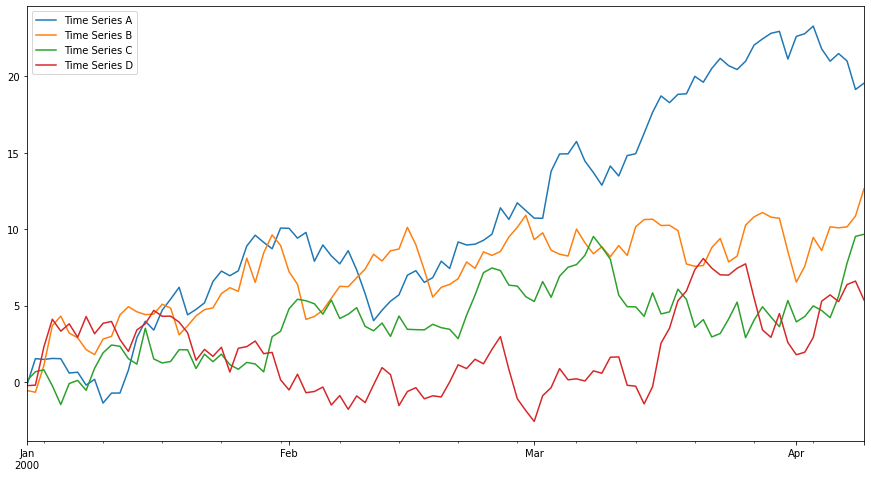

In [71]:
# Creation of multiple Time Series
df = pd.DataFrame(np.random.randn(100,4), 
                  columns=['Time Series A','Time Series B','Time Series C','Time Series D'],
                  index=pd.date_range("1/1/2000", periods=100)).cumsum()

print(df)
# Plotting the line
df.plot(figsize=(15,8))
plt.show()

The `.plot.bar()` can be used to create vertical or horizontal bar plots for data stored in a pandas DataFrame or Series object.

Here are some of the key features and arguments of the .plot.bar() method:

* ***Parameters***: The method takes several optional parameters that allow you to customize the appearance of the plot, such as the color, edge color, line width, transparency, and more. It also takes many of the same parameters as other plot methods in pandas, such as figsize, title, and xlabel.

* ***Vertical or horizontal bars***: By default, the method creates vertical bar plots, but you can also create horizontal bar plots by passing the kind='barh' parameter.

`.plot.bar()` [Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)

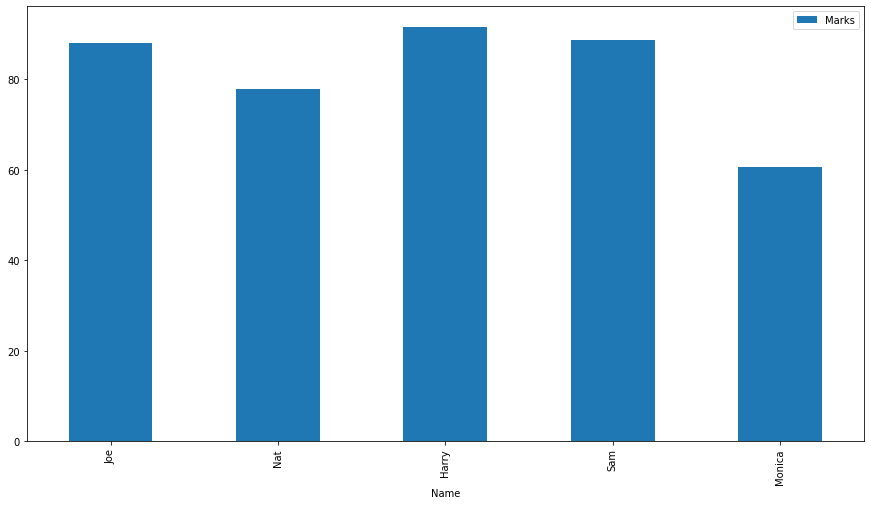

In [72]:
my_dict = {'Name':['Joe', 'Nat', 'Harry', 'Sam', 'Monica'],
           'Marks':[88.10,77.8,91.54,88.78,60.55]}

df = pd.DataFrame(my_dict)

df.plot.bar(x='Name',           # Specify the x-axis here
            y='Marks',          # Specify the y-axis here
            figsize=(15,8))     # You can add other parameters such as the figure size

plt.show()

The `plot.hist()` method can be used to create a histogram of a single column in a pandas DataFrame or Series object.

Here are some of the key features and arguments of the `plot.hist()` method:

*  **Parameters**: The method takes several optional parameters that allow you to customize the appearance of the plot, such as the number of bins, the color of the bars, and more. It also takes many of the same parameters as other plot methods in pandas, such as figsize, title, and xlabel.

*  **Binning**: The `plot.hist()` method automatically bins the data into a specified number of `bins` (default is 10), and displays the counts or frequencies of the data i
n each bin.

*  **Overlayed histograms**: You can create overlayed histograms of multiple columns in a DataFrame by calling `plot.hist()` on each column and passing `alpha` parameter to make them transparent.

*  **Cumulative histograms**: You can create cumulative histograms by passing the `cumulative=True` parameter. This will display the cumulative counts or frequencies of the data in each bin.

`plot.hist()` [Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html)

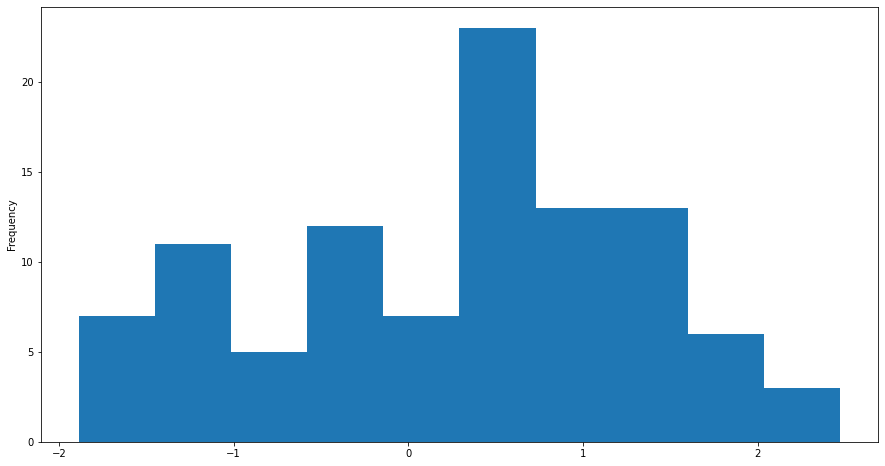

In [74]:
# Generating a random Series that follows a Normal Distribution
s = pd.Series(np.random.normal(loc=0,
                               scale=1,
                               size=100))

# Displaying the histogram
s.plot.hist(figsize=(15,8))
plt.show()

***Multiple histograms can be plotted*** on the same graph using `.plot.hist()` on a dataframe.

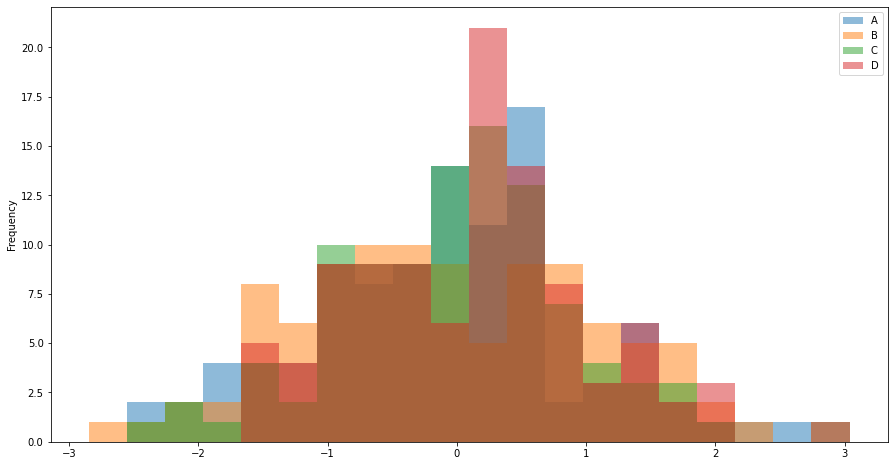

In [75]:
# Generating a random Series that follows a Normal Distribution
df = pd.DataFrame(np.random.normal(loc=0,
                                  scale=1,
                                  size=(100,4)),
                 columns=['A','B','C','D'])

# Displaying the histogram
df.plot.hist(bins=20,
             alpha=0.5,
             figsize=(15,8))
plt.show()

You can create ***multiple subplots with the `plot.hist()` method (and most of the other .plot pandas methods*** by passing the `subplots=True` parameter. This will create one subplot for each column in the DataFrame or Series.

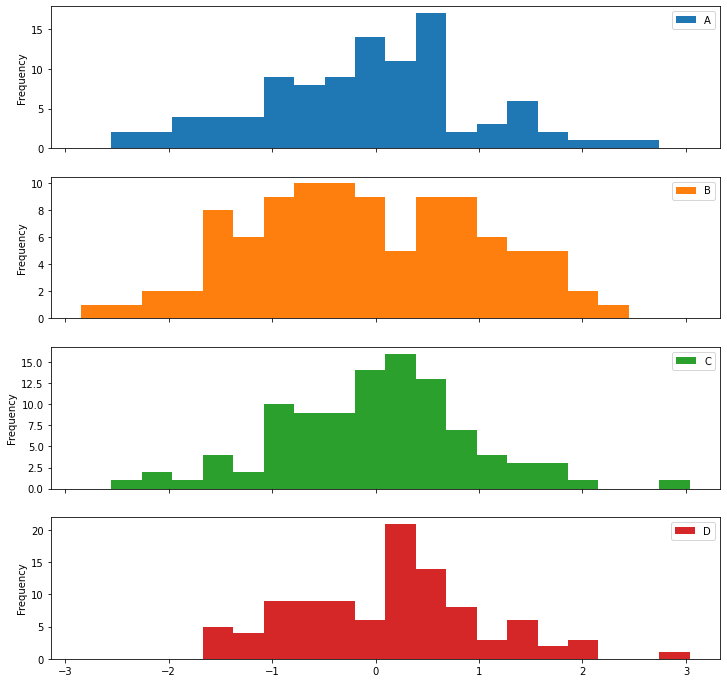

In [76]:
df.plot.hist(bins=20,
             subplots=True,
             figsize=(12,12))
plt.show()

The `plot.box()` method can be used to create a box plot of one or more columns in a pandas DataFrame.

Here are some of the key features and arguments of the plot.box() method:

* **Parameters**: The method takes several optional parameters that allow you to customize the appearance of the plot, such as the color of the boxes and whiskers, the style of the outliers, and more. It also takes many of the same parameters as other plot methods in pandas, such as figsize, title, and xlabel.

* **Multiple columns**: You can create box plots of multiple columns in a DataFrame by passing a list of column names to the column parameter.

`plot.box()` [Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.box.html)

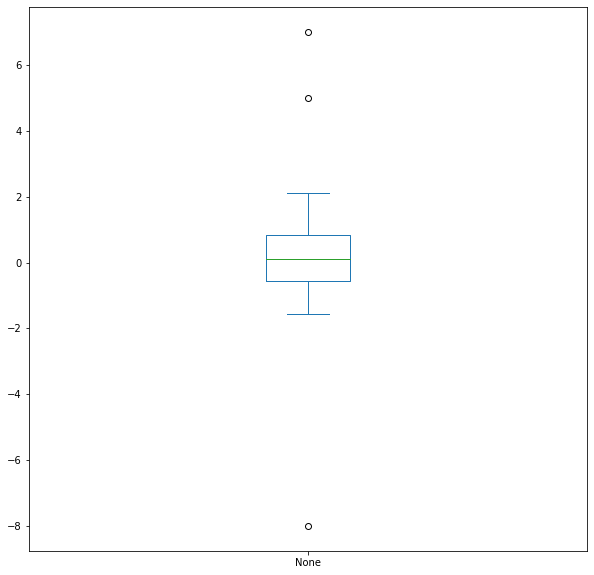

In [77]:
# Generating a random Series that follows a Normal Distribution
arr = np.random.normal(loc=0,
                       scale=1,
                       size=100)

# Generating some outliers
arr[25] = 7
arr[50] = 5
arr[75] = -8

s = pd.Series(arr)
s.plot.box(figsize=(10,10))
plt.show()

The `plot.scatter()` method can be used to create a scatter plot of two columns in a pandas DataFrame or Series object.

Here are some of the key features and arguments of the `plot.scatter()` method:

*  **Parameters**: The method takes several optional parameters that allow you to customize the appearance of the plot, such as the color, size, and shape of the markers, and more. It also takes many of the same parameters as other plot methods in pandas, such as `figsize`, `title`, and `xlabel`.

* **Multiple columns**: You can create scatter plots of multiple columns in a DataFrame by passing a list of column names to the `x` and` y` parameters.

*  **Color mapping**: You can map a third column in the DataFrame to the color of the markers by passing the column name to the `c` parameter. You can also specify the colormap and normalization for the color mapping with the `cmap` and `norm` parameters, respectively.

*  **Size mapping**: You can map a fourth column in the DataFrame to the size of the markers by passing the column name to the `s` parameter. You can also specify the scaling factor for the size mapping with the `s` parameter.

`plot.scatter()` [Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html?highlight=scatter#pandas.DataFrame.plot.scatter)

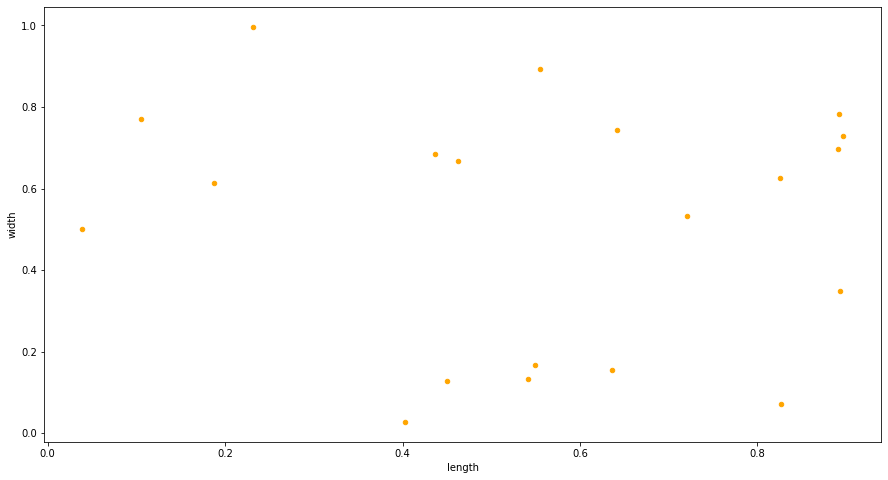

In [78]:
# Generating a dataframe with 3 columns
df = pd.DataFrame(np.random.random((20,3)),
                  columns=['length', 'width', 'species'])

df.plot.scatter(x='length',
                y='width',
                c='orange',       # Color of the dots
                figsize=(15,8))
plt.show()

The `plot.pie()` method can be used to create a pie chart of a single column in a pandas DataFrame or Series object.

Here are some of the key features and arguments of the `plot.pie()` method:

*  **Parameters**: The method takes several optional parameters that allow you to customize the appearance of the pie chart, such as the colors of the wedges, the size of the chart, and more. It also takes many of the same parameters as other plot methods in pandas, such as `figsize`, `title`, and `ylabel`.

*  **Explode**: You can "explode" one or more wedges by passing a list of values to the `explode` parameter. The values in the list specify the offset of the wedge from the center of the pie chart.

*  **Angle**: You can rotate the pie chart by passing the `startangle` parameter. This specifies the angle at which the first wedge starts, measured in degrees counterclockwise from the x-axis.

`plot.pie()` [Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html)

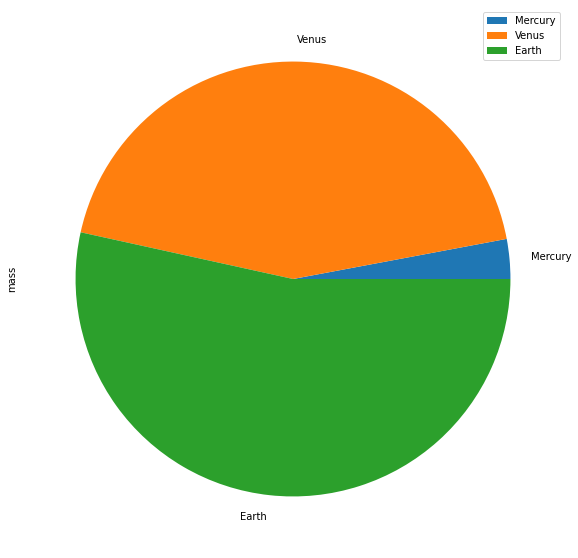

In [79]:
# Create a dataframe
df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
                   'radius': [2439.7, 6051.8, 6378.1]},
                  index=['Mercury', 'Venus', 'Earth'])

df.plot.pie(y='mass', 
            figsize=(10, 10))
plt.show()

## Exercise

In [121]:
import seaborn as sns

tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')
mpg = sns.load_dataset('mpg')
diamonds = sns.load_dataset('diamonds').sample(frac=0.01)
titanic = sns.load_dataset('titanic')

Use the tips DataFrame from seaborn.

**<font color='blue'>1.a. Create a histogram of the `total_bill` column using the `plot.hist()` method. <br>Experiment with different numbers of bins to find the best representation of the data.**

<AxesSubplot:ylabel='Frequency'>

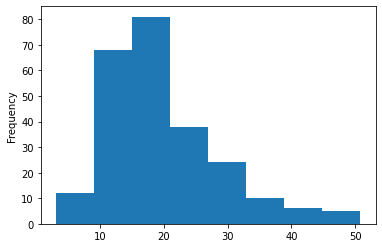

In [90]:
tips['total_bill'].plot.hist(bins = 8)

**<font color='blue'>1.b. Count the number of Male and Female in the `sex` column.<br> Display a bar graph of the counts using .plot.bar().**

*Tips: You can use the `value_counts()` method.*

<AxesSubplot:>

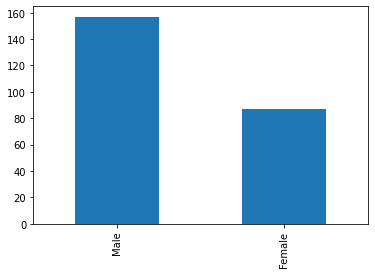

In [91]:
tips['sex'].value_counts().plot.bar()

**<font color='blue'>1.c. Create a boxplot graph of the `tip` column.<br>Is there any outlier ?**


<AxesSubplot:>

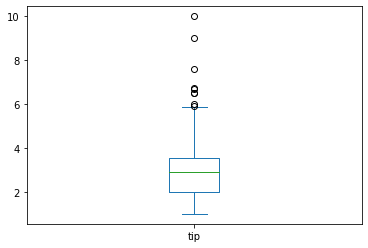

In [92]:
tips['tip'].plot.box()
#There are several outliers.

Use the iris dataset.

**<font color='blue'>2. Create a scatter plot of the `sepal_length` and `sepal_width` columns using the `plot.scatter()` method.**

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

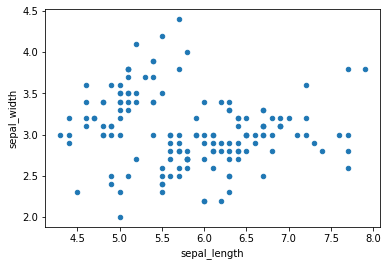

In [94]:
iris
iris.plot.scatter(x = 'sepal_length', y = 'sepal_width')

Use the mpg dataset

**<font color='blue'>3.a. Create a box plot of the mpg and the acceleration columns using the `plot.box()` method. The two boxplots should be on the same graph.**

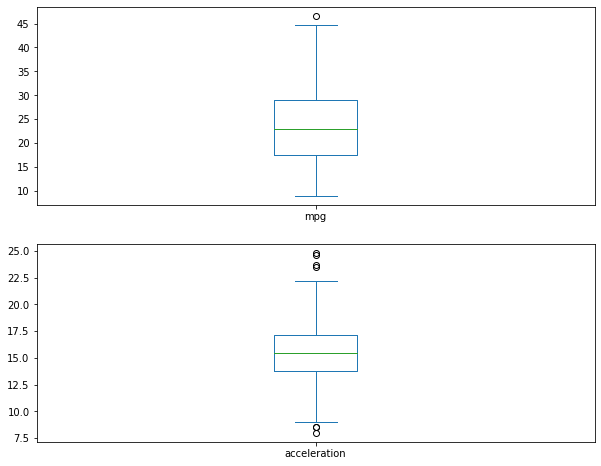

In [100]:
mpg
plt.figure(figsize = (10, 8))
plt.subplot(211)
mpg['mpg'].plot.box()
plt.subplot(212)
mpg['acceleration'].plot.box()
plt.show()

**<font color='blue'>3.b. Do the same with an histogram.<br> Make the histograms transparent.**

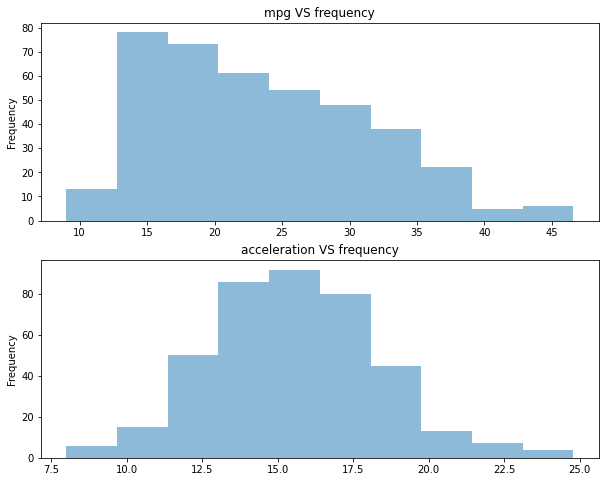

In [102]:
plt.figure(figsize = (10, 8))
plt.subplot(211)
plt.title('mpg VS frequency')
mpg['mpg'].plot.hist(alpha = 0.5)
plt.subplot(212)
plt.title('acceleration VS frequency')
mpg['acceleration'].plot.hist(alpha = 0.5)
plt.show()

Use the diamonds dataset.

**<font color='blue'>4.a. Create a scatter plot of the `carat` and `price` columns using the `plot.scatter()` method.**

<AxesSubplot:xlabel='carat', ylabel='price'>

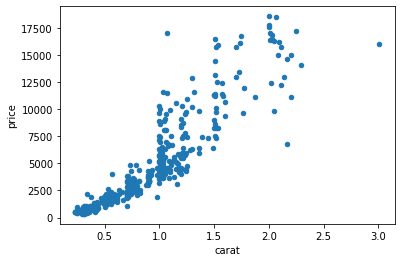

In [105]:
diamonds.plot.scatter(x = 'carat', y = 'price')

**<font color='blue'>4.b. Map the `table` column to the color of the markers using the c parameter.**

*Tips: You can use the cmap parameter to change the color palette*

<AxesSubplot:xlabel='carat', ylabel='price'>

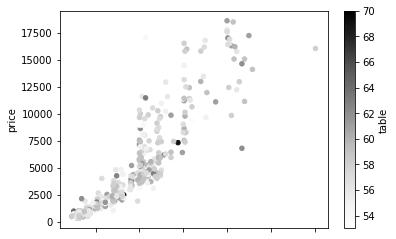

In [106]:
diamonds.plot.scatter(x = 'carat', y = 'price', c = 'table')

Use the titanic dataset.

**<font color='blue'>5. Create a pie chart of the counts of the `class` column using the `plot.pie()` method. <br>Explode the Third category of the class column.**

In [115]:
titanic['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [122]:
# titanic.info()
titanic['class'] = titanic['class'].map({
    "First": 1,
    "Second": 2,
    "Third": 3
})
titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,3,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,1,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,3,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,1,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,3,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,2,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,1,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,3,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,1,man,True,C,Cherbourg,yes,True


In [128]:
titanic['class'].plot.pie()
# titanic.info()

TypeError: Cannot setitem on a Categorical with a new category (0), set the categories first

# Load & Save files

## Lesson

***Loading files*** is one of the most common tasks in data analysis and Pandas provides many convenient functions ***to read and write data*** from a variety of sources. Here are a few common ones:

* `.read_csv()`: Reads data from a CSV file
* `.read_excel()`: Reads data from an Excel file
* `.read_json()`: Reads data from a JSON file
* `.read_sql()`: Reads data from a SQL database

Each of these functions takes one or more parameters that specify the location and format of the file to be read, as well as any additional options specific to the file format.

For example, the `read_csv()` function has some extra parameters such as:
* **sep**: Specifies the separator used in the CSV file. The default value is a comma, but it can be changed to any character or string.

* **header**: Specifies which row(s) to use as the column headers. This can be an integer, a list of integers, or None to indicate that there are no column headers.

* **index_col**: Specifies which column(s) to use as the index of the DataFrame. This can be an integer, a list of integers, or a column name.

* **usecols**: Specifies which columns to include in the DataFrame. This can be a list of integers or column names.

* **skiprows**: Specifies which row(s) to skip when reading the file. This can be an integer or a list of integers.

* **na_values**: Specifies a list of values that should be treated as missing values.

* **encoding**: Specifies the character encoding used in the CSV file.

`read_csv()` [Documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)<br>
`read_excel()` [Documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)

In [131]:
# Reading the Google Colab california housing dataset
df = pd.read_csv('california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [132]:
# Only keeping some columns
df = pd.read_csv('california_housing_train.csv',
                 usecols=['housing_median_age',	'total_rooms',	'total_bedrooms', 'median_house_value'])
df.head()

,housing_median_age,total_rooms,total_bedrooms,median_house_value
0,15.0,5612.0,1283.0,66900.0
1,19.0,7650.0,1901.0,80100.0
2,17.0,720.0,174.0,85700.0
3,14.0,1501.0,337.0,73400.0
4,20.0,1454.0,326.0,65500.0


In [133]:
# By default, most CSV files have the comma separator
# But, sometimes the CSV file separator can be different
# For example, it can be \t
df = pd.read_csv('california_housing_train.csv',
                 sep='\t')
df.head()

,"longitude,""latitude"",""housing_median_age"",""total_rooms"",""total_bedrooms"",""population"",""households"",""median_income"",""median_house_value"""
0,"-114.310000,34.190000,15.000000,5612.000000,12..."
1,"-114.470000,34.400000,19.000000,7650.000000,19..."
2,"-114.560000,33.690000,17.000000,720.000000,174..."
3,"-114.570000,33.640000,14.000000,1501.000000,33..."
4,"-114.570000,33.570000,20.000000,1454.000000,32..."


***Saving files*** is another common task in data analysis and Pandas provides several functions to write data to a variety of file formats. To save a Pandas DataFrame to a file, we first need to create the DataFrame and do any necessary manipulations. Once we have the DataFrame, we can use one of the following functions to write it to a file:

* `.to_csv()`: Writes the DataFrame to a CSV file
* `.to_excel()`: Writes the DataFrame to an Excel file
* `.to_json()`: Writes the DataFrame to a JSON file
* `.to_sql()`: Writes the DataFrame to a SQL database

Pandas provides many additional options for writing files, depending on the specifics of the data and file format.

For example, the `to_csv()` function has some extra parameters such as:
* **path_or_buf**: Specifies the location of the CSV file to be written. This can be a file path, a file-like object, or None to return the CSV data as a string.

* **sep**: Specifies the separator used in the CSV file. The default value is a comma, but it can be changed to any character or string.

* **header**: Specifies whether to include the column headers in the CSV file. This can be True, False, or a list of column names.

* **index**: Specifies whether to include the index in the CSV file. This can be True, False, or a column name.

In [134]:
df = pd.DataFrame(np.random.random((10,5)),
                  columns=['A','B','C','D','E'])
df

,A,B,C,D,E
0,0.848456,0.997622,0.551657,0.178139,0.353354
1,0.794821,0.971801,0.820121,0.217730,0.678361
2,0.964896,0.374787,0.267646,0.113184,0.677983
3,0.567594,0.828154,0.335108,0.820729,0.694632
4,0.551882,0.999626,0.039998,0.743351,0.044606
5,0.761528,0.522410,0.696313,0.468078,0.889752
6,0.931691,0.842581,0.805763,0.083010,0.848281
7,0.855145,0.893186,0.944695,0.533054,0.030314
8,0.390604,0.323863,0.913486,0.448110,0.334604
9,0.946672,0.282040,0.839655,0.483999,0.966593


In [137]:
df.to_csv('dataframe.csv', index = False)

## Exercises

**<font color='blue'>1. Load the `dataframe_1.csv` correclty.**

In [138]:
df1 = pd.read_csv('dataframe.csv')
df1

,A,B,C,D,E
0,0.848456,0.997622,0.551657,0.178139,0.353354
1,0.794821,0.971801,0.820121,0.217730,0.678361
2,0.964896,0.374787,0.267646,0.113184,0.677983
3,0.567594,0.828154,0.335108,0.820729,0.694632
4,0.551882,0.999626,0.039998,0.743351,0.044606
5,0.761528,0.522410,0.696313,0.468078,0.889752
6,0.931691,0.842581,0.805763,0.083010,0.848281
7,0.855145,0.893186,0.944695,0.533054,0.030314
8,0.390604,0.323863,0.913486,0.448110,0.334604
9,0.946672,0.282040,0.839655,0.483999,0.966593


**<font color='blue'>2. Add a column to this dataframe.**

In [143]:
df1['F'] = np.random.random((10,1))
df1

,A,B,C,D,E,F
0,0.848456,0.997622,0.551657,0.178139,0.353354,0.887389
1,0.794821,0.971801,0.820121,0.217730,0.678361,0.750967
2,0.964896,0.374787,0.267646,0.113184,0.677983,0.975264
3,0.567594,0.828154,0.335108,0.820729,0.694632,0.038604
4,0.551882,0.999626,0.039998,0.743351,0.044606,0.216079
5,0.761528,0.522410,0.696313,0.468078,0.889752,0.014145
6,0.931691,0.842581,0.805763,0.083010,0.848281,0.383175
7,0.855145,0.893186,0.944695,0.533054,0.030314,0.614373
8,0.390604,0.323863,0.913486,0.448110,0.334604,0.810655
9,0.946672,0.282040,0.839655,0.483999,0.966593,0.677113


**<font color='blue'>3. Save it back as a CSV file.**

In [145]:
df1.to_csv('dataframe_1.csv', index = False)